## **PROGRAMACION II - U1T2**
_ _ _ _

### **CODIGO** 
1. Conceptos fundamentales de Programación Orientada a Objetos (OOP) en python:
- Abstraccion
- Encapsulamieto
- Herencia
- Polomorfismo
 
2. Sobrecarga de Operadores en Python:
- Metodos especiales como __eq__ y __add__

3. Patrones de diseño basicos:
- Strategy Pattern
- Decorator Pattern
- Singleton Pattern

4. Uso de UML para deseño de software:
- Diagrama de clases
- Relaciones (Herencia, composicion, asociación)

5. Buenas practicas de programacion en python:
- Organizacion modular del codigo
- Uso de getters y setters
- Documentación de clases y metodos con docstrings


In [ ]:
from abc import ABC, abstractmethod

# 1. Strategy Pattern - Estrategia de conduccion
# Clase de Estrategias de Conduccion
class EstrategiaConduccion(ABC):
    @abstractmethod
    def conducir(self, vehiculo):
        pass
    
# Estrategias concretas    
class ConduccionNormal(EstrategiaConduccion):
    def conducir(self, vehiculo):
        print(f"\n{vehiculo.tipo()}: '{vehiculo.marca}' '{vehiculo.modelo}'\n")
        print(f"{vehiculo.tipo()}: '{vehiculo.marca}' '{vehiculo.modelo}'  Conducción de manera normal activada.")
        #return "Condución de manera Normal activada."

class ConduccionDeportiva(EstrategiaConduccion):
    def conducir(self, vehiculo):
        print(f"{vehiculo.tipo()}: '{vehiculo.marca}' '{vehiculo.modelo}' Conducción de maneradeportiva activada.")
        #return "Condución de manera Deportiva activada."

class ConduccionEconomica(EstrategiaConduccion):
    def conducir(self, vehiculo):
        print(f"{vehiculo.tipo()}: '{vehiculo.marca}' '{vehiculo.modelo}'  Condución de manera economica activada.")
        #return "Conducción de manera Economica activada."
    
# 2. Clase Abstracta Vehiculo - Abstraccion y Encapsulamiento
class Vehiculo(ABC):
    def __init__ (self, marca, modelo):
        self.marca = marca
        self.modelo = modelo
        self.conduccion = None # Estrategia de conduccion
        
    def set_conduccion(self, estrategia): # Asigna un estrategia de conduccion
        self.conduccion = estrategia
        
    def conducir(self): # Ejecuta la estrategia de conduccion asignada
        if self.conduccion:
            self.conduccion.conducir(self)
        else:
            print("No hay estrategia de conducción asignada.")
    
    @abstractmethod
    def tipo(self): # Devuelve el tipo de vehiculo
        pass
    
    # Sobrecarga de operador ==
    def __eq__(self, other): # Sobrecarga de operador == para comparar vehiculos por marca y modelo
        return isinstance(other, Vehiculo) and self.marca == other.marca and self.modelo == other.modelo
    
    # Sobrecarga de operador +
    def __add__(self, other): # Sobrecarga del operador + para agregar un vehiculo a la flota
        if isinstance(other, Vehiculo):
            flota = ControlDeFlota.obtener_instancia()
            flota.agregar_vehiculo(other)
            return self
        raise TypeError("Solo se pueden agregar objetos de tipo Vehiculo a la flota.")

# 3. Subclase de Vehiculo - Herencia y Polimorfismo
class Automovil(Vehiculo):
    def tipo(self):
        return "Automovil"

class Camion(Vehiculo):
    def tipo(self):
        return "Camion"
    
class Motocicleta(Vehiculo):
    def tipo(self):
        return "Motocicleta"
    
# 4. Decorator Patters - Funcionalidades adicionales
class VehiculoDecorator(Vehiculo):
    def __init__(self, vehiculo):
        self.vehiculo = vehiculo
    
    def __getattr__(self, nombre):
        return getattr(self.vehiculo, nombre)
    
    def tipo(self):
        return self.vehiculo.tipo()
    
    def conducir(self):
        self.vehiculo.conducir()
        
    def __eq__(self, other):
        return self.vehiculo == other
    
    def __add__(self, other):
        return self.vehiculo + other

# Decorador concreto: Piloto automatico    
class PilotoAutomaticoDecorator(VehiculoDecorator):
    def conducir(self):
        self.vehiculo.conducir()
        print("-> Piloto automatico activado.")

# Decorador concreto: Asistente de estacionamiento        
class AsistenteEstacionamientoDecarator(VehiculoDecorator):
    def conducir(self):
        self.vehiculo.conducir()
        print("-> Asistente de estacionamiento activado.")
        
# 5. Singleton Pattern - Control de Flota Único
class ControlDeFlota:
    _instancia = None # Guarda la unica instancia
    
    def __init__(self): # Constructor privado
        if ControlDeFlota._instancia is not None:
            raise Exception("Esta clase esta en sigleton")
        self.vehiculos = [] 
        
    @staticmethod
    def obtener_instancia(): # Accede a la instancia
        if ControlDeFlota._instancia is None:
            ControlDeFlota._instancia = ControlDeFlota()
        return ControlDeFlota._instancia
    
    def agregar_vehiculo(self, vehiculo):
        if vehiculo not in self.vehiculos:
            self.vehiculos.append(vehiculo)
    
    def listar_vehiculos(self):
        print("\n Flota de Vehiculo actual:")
        for r in self.vehiculos:
            print(f"·{r.tipo()}: {r.marca} {r.modelo}")
        if not self.vehiculos:
            print("-> No hay vehiculos en la Flota")
        
        
        
    

In [ ]:
# Ejemplo

if __name__ == "__main__":
    auto = Automovil("Toyota", "Corolla")
    camion = Camion("Volvo Gama", "FH")
    moto = Motocicleta("Honda", "CBR")
    
    #Asignar estrategias de conduccion
    auto.set_conduccion(ConduccionNormal())
    camion.set_conduccion(ConduccionDeportiva())
    moto.set_conduccion(ConduccionEconomica())
    
    #Aplicar Decoradores
    autoDec = PilotoAutomaticoDecorator(auto)
    camionDec= AsistenteEstacionamientoDecarator(camion)
    
    # Se llama el metodo 'conducir()' para cada vehiculo
    auto.conducir()
    moto.conducir()
    camion.conducir()
    
    otro_auto = Automovil("Toyota", "Corolla")
    print("\n¿Son iguales?", auto == otro_auto)
    
    # Sobrecarga de operadores + 
    auto + moto
    auto + camion
    
    flota = ControlDeFlota.obtener_instancia() # Se obtine la instancia unica (singleton) de control de flota
    flota.listar_vehiculos()

    
        


Auto: 'Automovil' 'Toyota' 'Corolla'

Automovil: 'Toyota' 'Corolla'  Conducción de manera normal activada.
Motocicleta: 'Honda' 'CBR'  Condución de manera economica activada.
Camion: 'Ford' 'F-150' Conducción de maneradeportiva activada.

¿Son iguales? True

 Flota de Vehiculo actual:
·Motocicleta: Honda CBR
·Camion: Ford F-150


### **DIAGRAMA UML**
- Diagrama de clases (con herencia, estrategias, decoradores, singleton).

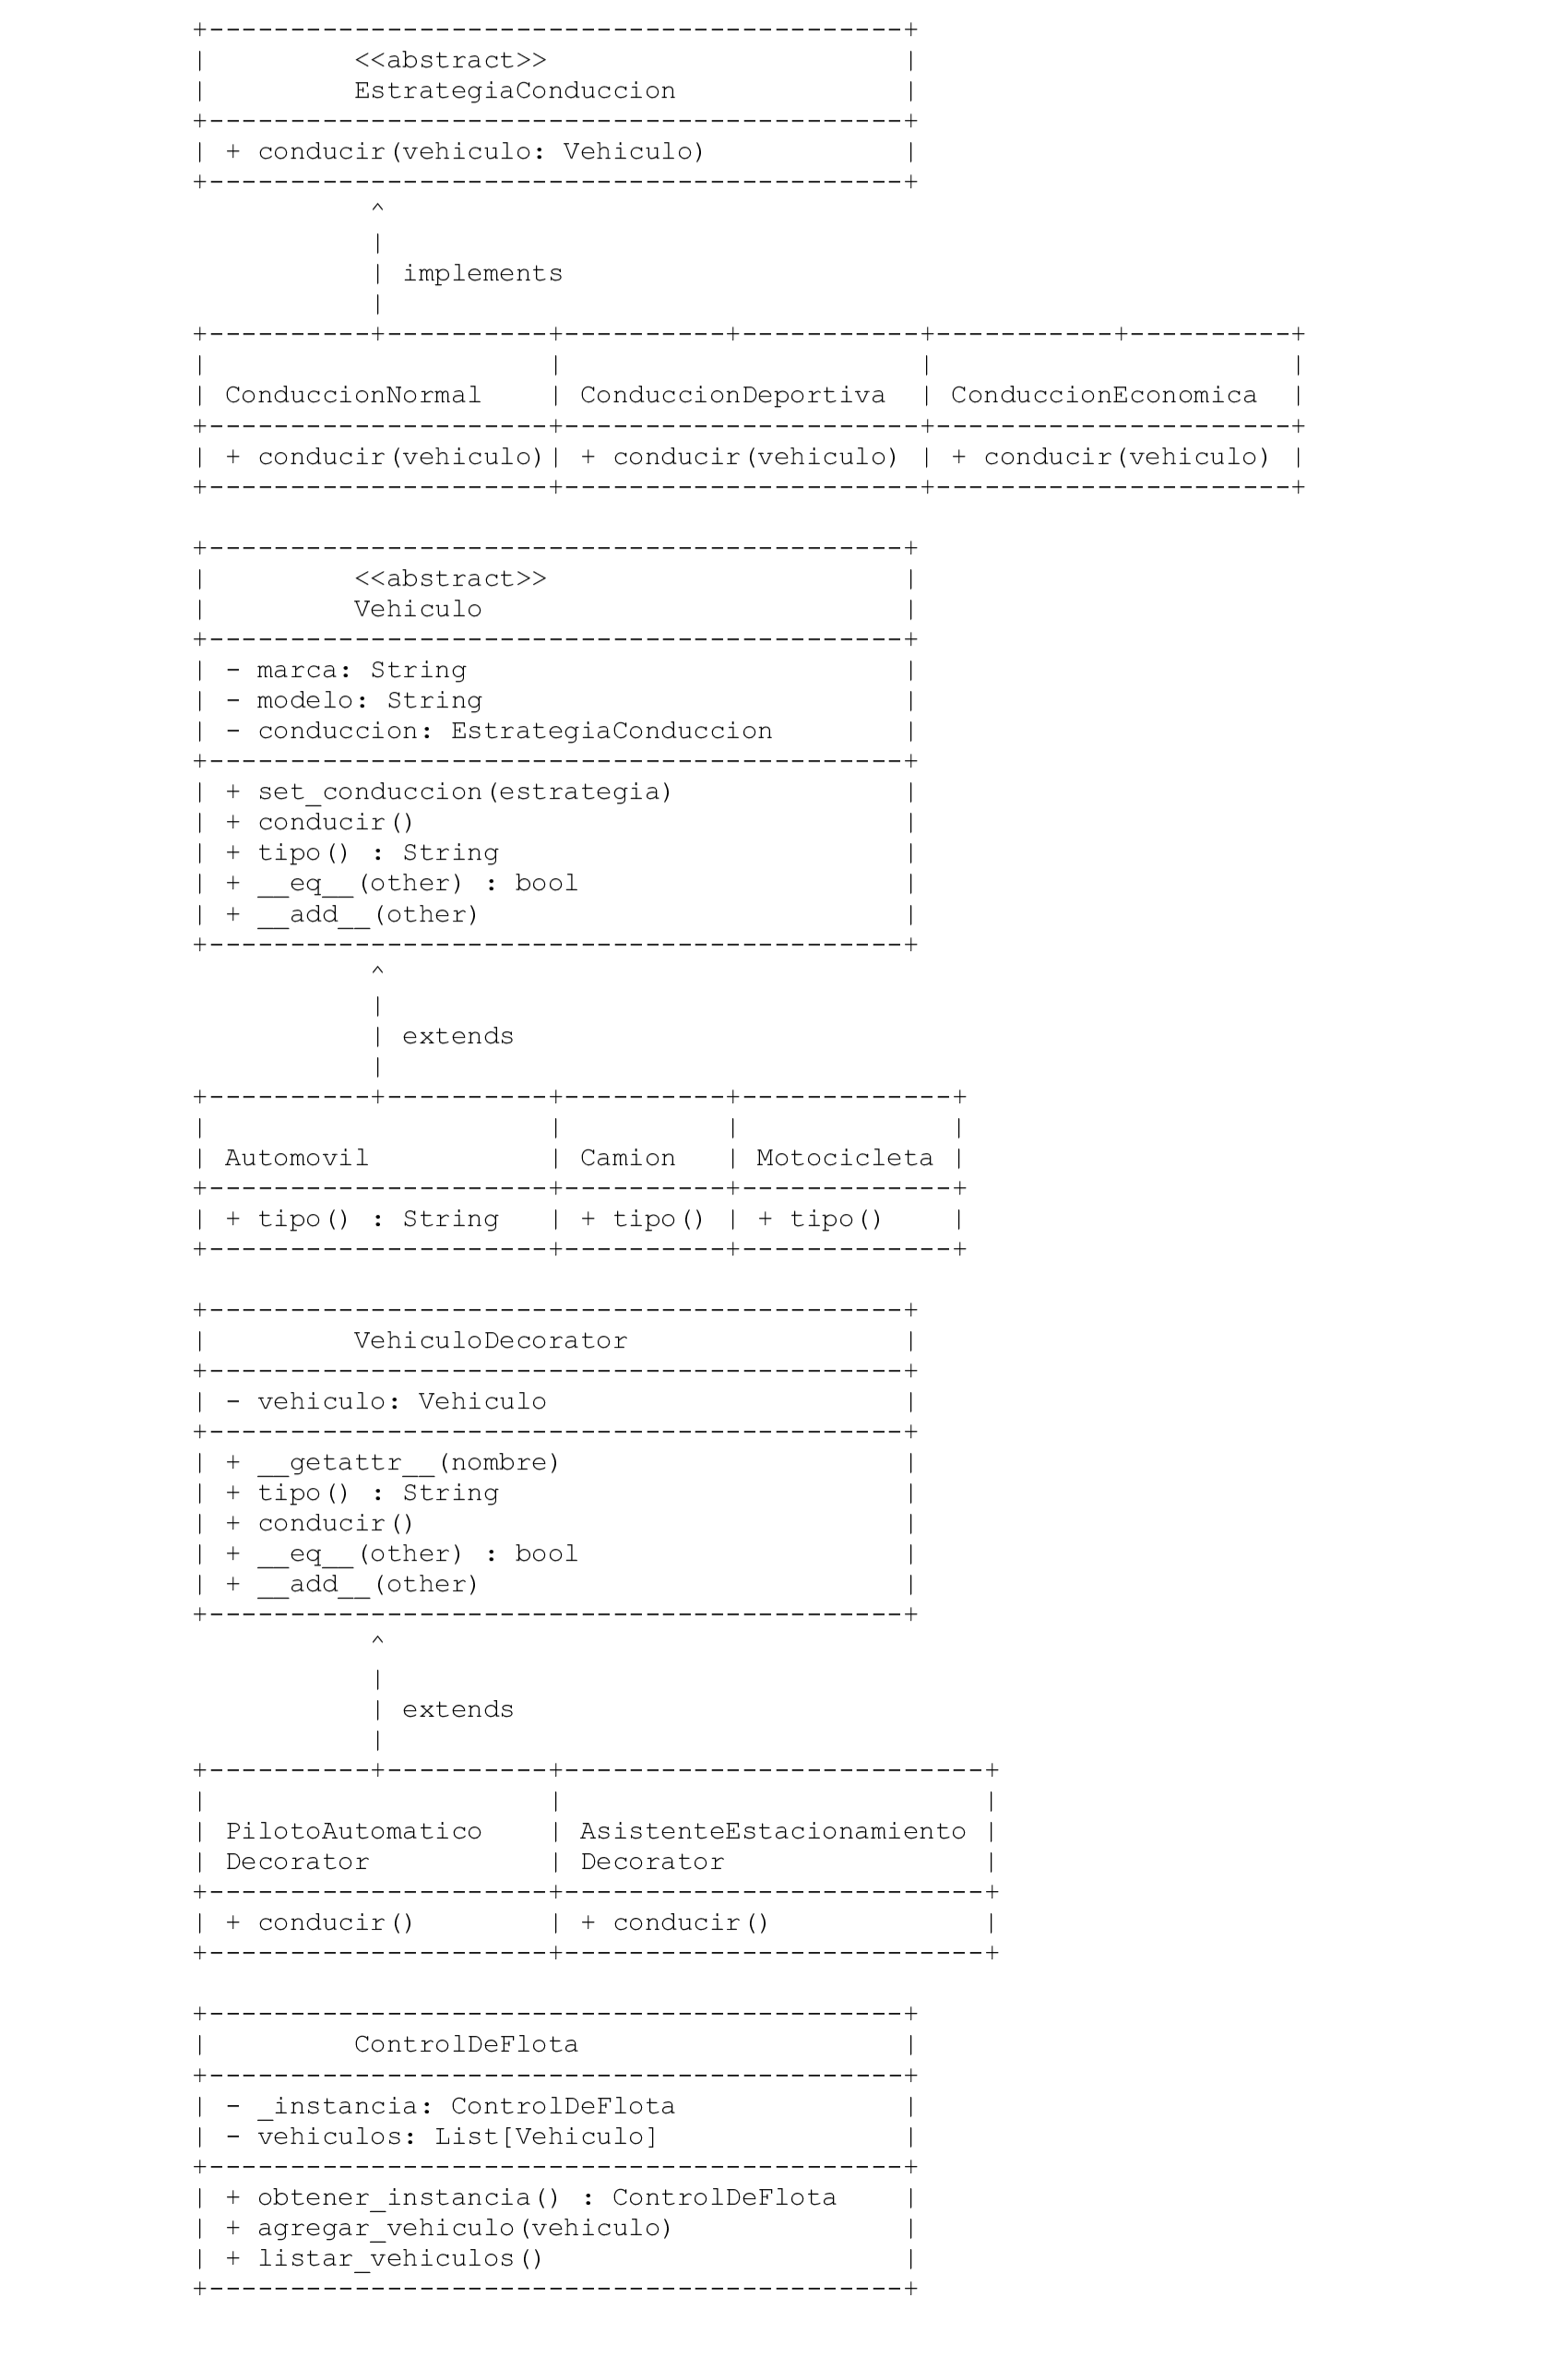

### **JUSTIFICACION DEL CODIGO**

Se llevo a cabo un solucion basada en objetos en Python, combinando principios de Programacion Orientada a Objetos y patrones de diseño para modelar vehiculos con comportamientos variables y funciones extendibles.

#### **Sistema**

1. **Patron Strategy - Estrategias de conduccion**
    
    Las clases 'EstrategiaConduccion', 'ConduccionNormal', 'ConduccionDeportiva' y 'ConduccionEconomica' establecen el patron de Conduccion.
    Este diseño facilita la asunción de diversas maneras de manejar a los vehiculos durante su ejecucion, sin alterar su estructura. Cada estrategia pone en practica el metodo de conduccion, que se refiere al vehiculo como argumento.

2. **Clase Abstracta "Vehiculo" - Abstracción, Encapsulamiento y Sobrecarga**

    Se establecen caracteristicas compartidad como marca, modelo y una táctica de manejo. Incluye técnicas especiales '__eq__' y __add__ para evaluar coches y simplificar su incorporacion a una flota centralizada.

3. **Subclases Concretas - Herencia y Polimorfismo**
    
    'Automovil', 'Camion', 'Motocicleta' heredan caracteristicas de 'Vehiculo', aplicando el metodo 'tipo()' de acuerdo a su categoria. Esto facilita la implemetacion de polimorfismo para conductas distintas.

4. **Patrón Decorator - Funcionalidades Adicionales sin Modificar la Clase Base**
   
    'VehiculoDecorator' permite añadir capacidades adicionales como 'PilotoAutomatico' y 'AsistenteEstacionamiento' de manera adptable, mantenamiento la responsabilidad abierta a expandirse para limitar la alteracion (principio OCP).

5. **Patron Singleton - Control Centralizado de la Flota**

    'ControlFlota' asegura que unicamente haya un departamento responsable de guardar y administrar los vehiculos del sistema. Esto garantiza coherencia en el manejo centralizado de la flota.